# General Python Guideline

## 1) Data Structures

### Tuples

Tuples are immutable as opposed to lists. You cannot change values in the index without creating a new tuple.

### 1.1) Lists

Useful operations on lists

In [11]:
a = [1,2,3]
a.append("a") # append at last position
a.extend([4,5,6]) # = a + [4,5,6]
a.pop() # delete last position
a.remove(1) # removes 1 and pops it --> [2,3,”a”]
a[0], a[1] = a[1], a[0] # swap positions
len(a) #length of the list
a.index(3) # returns 2, the position of 3 (if repeated elements it returns the first instance)

ls = [[1,2],[3,4]]
ls[0][0] # refers to first element of first list
list(range(5,8)) #[5,6,7]


[5, 6, 7]

List comprehension (for loops inside lists for easier code)

In [15]:
lst = [1,2]
lst = [x + i for x in lst for i in range(2)] # [1,2,2,3]
d = []
[d.append(x) for x in lst if x not in d] # unique elements of other_list
print(d)
print(lst[0:1] + ["a"] + lst[1:]) # append at specific location in list (location 1 in this case)

#[f(x) if condition else g(x) for x in sequence] → two functions for if else


[1, 2, 3]
[1, 'a', 2, 2, 3]


For parallel iteration between lists use zip

In [17]:
a = [1,2,3]
b =["a","b","c"]
print(list(zip(a,b)))

for e1,e2 in zip(a,b):
    print(e1,e2)

[(1, 'a'), (2, 'b'), (3, 'c')]
1 a
2 b
3 c


Enumerate a list if you need the index of an element and the element

In [20]:
print(list(enumerate(["a","b","c"]))) #Notice it's the same as zipping [0,1,2] and ["a","b","c"]
for i,x in enumerate(["a","b","c"]):
    print(i,x)

[(0, 'a'), (1, 'b'), (2, 'c')]
0 a
1 b
2 c


Nested lists: it's generally a good idea to use recursion when you have undetermined number of nests. For example imagine we want to change all the elements in a nested list such that:

In [102]:
# [1,[[1,1]],[1]] --> [0,[[0,0]],[0]]

def nested_list(original):
    for element in original:
        if type(element) is not list:
            original[original.index(element)] = 0
        else:
            nested_list(element)
    return original

nested_list([1,[[1,1]],[1]])    

[0, [[0, 0]], [0]]

### 1.2) Dictionaries

Hash tables → store items, delete and search on average in the fastest way. 

How do hash tables work? Imagine you have an array,how would you do search fastly? 

Imagine array [0,1,2,3,4, None, 6]: → Is 3 in the array? 

if array[2] == 3: return ("YES") 
    
Is 5 in the array? → 

if array[4] == 5 : returns ("YES")
else : return ("NO)

This is all done in constant time because you know where the exact location of the element should be; this is aasy if your keys are limited and small, not so easy if they are not (imagine a string with 8 letters you have 27^8 possible keys). You're not going to fill a dictionary with 27^8 empty keys.

What if you have strings and not integers as keys? Do prehashing → map strings to non negative integers. “Aaa” -> 1 “aab” → 2.

How do you reduce space of possible keys?

Reduce from the space of possible keys to m (size of the table) through a hashing function.

CHAINING is one method: Linked list of possible keys that collide, so worst case you have O(n). Under randomization you can map pretty evenly, a one to one relationship. Assume uniformity and independence between where keys map.


In [49]:
# Appending to a dictionary

d = {}
d["a"] = 1
print(d)

# Join two lists to create a dictionary

a = ["A","B","C"]
b = [1,2,3]
print(dict(zip(a,b)))

# Iterate over keys

for key,value in dict(zip(a,b)).items():
    print(key,value)
    
# If you want to get the maximum over the values of a dictionary

d = {"A":2,"B":7,"C":10}

# 1.

print("Approach 1 (inefficient):", max(d.items(),key = lambda t: t[1])[1])

#2. for a faster approach

import operator
print("Approach 2 (efficient):", max(d.items(), key=operator.itemgetter(1))[1])


{'a': 1}
{'A': 1, 'B': 2, 'C': 3}
A 1
B 2
C 3
Approach 1 (inefficient): 10
Approach 2 (efficient): 10


### 1.3) Collections

High-performance container datatypes

#### 1.3.1) Deques

For fast pop and append data structure (since lists are optimized for fixed length operations changing it requires an O(n) change in memory). 

In [23]:
from collections import deque

deq = deque([1,2,3])

#METHODS FOR DEQUE

deq.append(4) # Add x to the right side of the deque.
print(deq)
deq.appendleft(0) # Add x to the left side of the deque.
print(deq)
deq.clear() #Remove all elements from the deque leaving it with length 0.
print(deq)

deq = deque([1,1,1,2,2,3])
print("Number of times 1 appears:",deq.count(1)) # Count the number of deque elements equal to 1.

deq.pop() #Remove and return an element from the right side of the deque. If no elements are present, raises an IndexError.
deq.popleft() #Remove and return an element from the left side of the deque. If no elements are present, raises an IndexError.
deq.remove(2) #Remove the first occurrence of value. If not found, raises a ValueError.
deq.reverse() #Reverse the elements of the deque in-place and then return None.

deque([1, 2, 3, 4])
deque([0, 1, 2, 3, 4])
deque([])
Number of times 1 appears: 3


#### 1.3.2) Counters

A Counter is a dict subclass for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts.

It also allows for set operations, union, intersection, subtracting and adding.

In [36]:
from collections import Counter

natural = Counter(range(1,10)) 
odds = Counter([1,3,5,7,9])
even = natural-odds
print("Subtracting odds from natural:", even)
ca = Counter(["h","j","a"])
cb = Counter(["h","k","a","g"])
print("Set1:", list(ca.elements()))
print("Set2:", list(cb.elements()))
cint = ca & cb
print("Intersection Set1 & Set2:", list(cint.elements()))

# ADDITIONAL METHODS TO DICTIONARY

ca.elements() # Return an iterator over elements repeating each as many times as its count. Elements are returned in arbitrary order.
ca = Counter(["a","a","a","b","c","c"])
ca.most_common(2) 

Subtracting odds from natural: Counter({2: 1, 4: 1, 6: 1, 8: 1})
Set1: ['h', 'j', 'a']
Set2: ['h', 'k', 'a', 'g']
Intersection Set1 & Set2: ['h', 'a']


[('a', 3), ('c', 2)]

#### 1.3.3) Ordered Dicts

Ordered dictionaries are just like regular dictionaries but they remember the order that items were inserted. When iterating over an ordered dictionary, the items are returned in the order their keys were first added.

In [8]:
from collections import OrderedDict

d = {'banana': 3, 'apple': 4, 'pear': 1, 'orange': 2}
OrderedDict(sorted(d.items(), key=lambda t: t[0])) # Sort by alphabet

OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('pear', 1)])

#### 1.3.4) Default Dicts

When the values in a dictionary are collections (lists, dicts, etc.) the value (an empty list or dict) must be initialized the first time a given key is used. While this is relatively easy to do manually, the defaultdict type automates and simplifies these kinds of operations.

A defaultdict works exactly like a normal dict, but it is initialized with a function (“default factory”) that takes no arguments and provides the default value for a nonexistent key.

A defaultdict will never raise a KeyError. Any key that does not exist gets the value returned by the default factory.

In [28]:
from collections import defaultdict

print("Default Dict")
ice_cream = defaultdict(lambda: 'Vanilla')
ice_cream['Sarah'] = 'Chunky Monkey'
ice_cream['Abdul'] = 'Butter Pecan'
print(ice_cream['Sarah'])
print(ice_cream['Joe'])

ic = {"Sarah" : "Chunky Monkey",
     "Abdul" : "Butter Pecan"}

print("")
print("Regular Dict")
for elem in ["Sarah", "Joe"]:
    try:
        print(elem, ":", ic[elem])
    except KeyError:
        print(elem, ":", "Key Error was raised")

Default Dict
Chunky Monkey
Vanilla

Regular Dict
Sarah : Chunky Monkey
Joe : Key Error was raised


### 1.4) Binary heaps

Data structure which allows easy extraction of mins or maxs.

A heap is a binary tree in which each node has a smaller key than its children; this property is called the heap property or heap invariant.

To implement DELETE-MIN, we can easily find the value to return at the top of the heap. Unfortunately, removing it leaves a vacuum that must be filled in by some other element. The easiest way to do this is to grab a leaf (which probably has a very high key), and then float it down to where it belongs by swapping it with its SMALLEST child at each iteration. After time proportional to the depth, the heap invariant is restored.

To push a new element you start at the next position available, compare with parent and swap if necessary.

Tree with heap invariant property


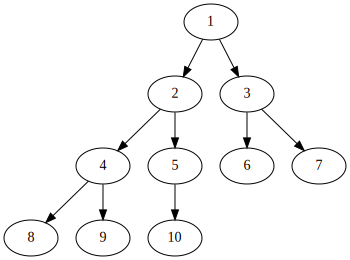

In [1]:
# In Anaconda Prompt if package not installed
# > conda install python-graphviz

print("Tree with heap invariant property")
from graphviz import Digraph

heaps = Digraph()
for i in range(1,11):
    heaps.node(str(i),str(i))
heaps.edge("1", "2")
heaps.edge("1","3")
heaps.edge("2","4")
heaps.edge("2","5")
heaps.edge("3","6")
heaps.edge("3","7")
heaps.edge("4","8")
heaps.edge("4","9")
heaps.edge("5","10")
heaps


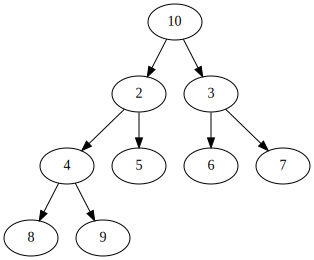

In [2]:
heaps = Digraph()
for i in range(2,11):
    heaps.node(str(i),str(i))
heaps.edge("10", "2")
heaps.edge("10","3")
heaps.edge("2","4")
heaps.edge("2","5")
heaps.edge("3","6")
heaps.edge("3","7")
heaps.edge("4","8")
heaps.edge("4","9")
heaps

2nd Iteration


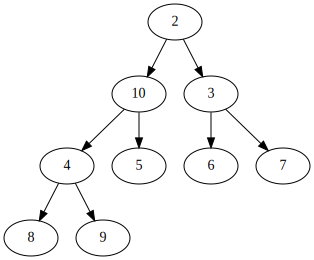

In [3]:
print("2nd Iteration")
heaps = Digraph()
heaps.node("2","2")
heaps.node("10","10")
for i in range(3,10):
    heaps.node(str(i),str(i))
heaps.edge("2", "10")
heaps.edge("2","3")
heaps.edge("10","4")
heaps.edge("10","5")
heaps.edge("3","6")
heaps.edge("3","7")
heaps.edge("4","8")
heaps.edge("4","9")
heaps


3rd Iteration


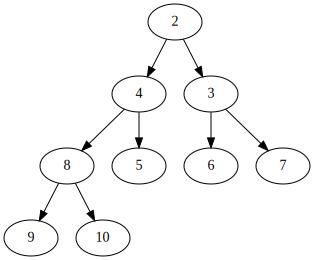

In [4]:
print("3rd Iteration")
heaps = Digraph()
heaps.node("4","4")
heaps.node("8","8")
for i in range(2,10):
    if i not in [4,8]: heaps.node(str(i),str(i))
heaps.edge("2", "4")
heaps.edge("2","3")
heaps.edge("4","8")
heaps.edge("4","5")
heaps.edge("3","6")
heaps.edge("3","7")
heaps.edge("8","10")
heaps.edge("8","9")
heaps

In [5]:
import heapq
l = [10,5,7,2,4,3,1,9,6,8]
print("Initial array:", l)
heapq.heapify(l)
print("Heapified array:", l)
heapq.heappop(l) # pop and return smallest value from heap, maintaining invariance
print("Popped array with heap invariance:",l)
heapq.heappush(l, 11) # push value maintaining invariance

# You can push tuples (i, (x,y)) for example and it will push them with i as the minimization parameter.


Initial array: [10, 5, 7, 2, 4, 3, 1, 9, 6, 8]
Heapified array: [1, 2, 3, 5, 4, 10, 7, 9, 6, 8]
Popped array with heap invariance: [2, 4, 3, 5, 8, 10, 7, 9, 6]


### 1.5) Numpy

For big items lists become inefficient as opposed to C or Fortran. 

Numpy makes use of compiler advantages to avoid overhead in list analysis. 

Great for operations that are naturally vectorized.

In [82]:
import numpy as np

x = np.random.uniform(0, 1, size=1000000)
print(x.mean())

array = np.array([[1,2],
                  [3,4]])

# METHODS

array = array.flatten() # columns to one single vector [1,2,3,4]
np.vstack([[1,3],[3,4],[5,6]]) # a single vertical vector
np.cross([1,2,3], [3,2,1]) # the length of resulting vector is the area of parallelogram of two vectors with same origin
np.linalg.norm(np.array([[1,2,3]])) # length of vector

array2 = np.array([[1,2],
                  [3,4]])
print("Sample matrix:")
print(array2)
print("Nesting level:",array2.ndim)
print("Dimensions:", array2.shape)
print("Number of elements in matrix:", np.size(array2))
print()
print("Unique elements:",np.unique([[1,1,3,4,5,6,6]])) # unique elements

# Rows to columns

arr = [[1,2,3],
       [4,5,6],
       [7,8,9]]

array = zip(*arr)
list(array) # returns columns * is the unpacking operator, so it gives the first element of arrays

np.square(arr) # np.square(), np.sum(), np.cumsum(), np.var(), np.mean(), np.std()

# Dot product

M1 = np.array([[5,7],
               [9,9]])
M2 = np.array([[3,7],
               [8,1]])

M1@M2 # Matrix multiplication 5*3+7*8 = 71, 5*7+7*1 = 42 ...

M1+M2 # Sum elements (for square matrices)

M1.transpose() # Transpose matrix

# To delete columns or rows

print("Entire Matrix:")
print(np.array(arr))
aux = np.array(arr)
aux = np.delete(aux, 1, axis=1) # columns
aux = np.delete(aux, 0, axis=0) # rows
print("Deleted columns and rows:")
print(aux)

0.4997284510655524
Sample matrix:
[[1 2]
 [3 4]]
Nesting level: 2
Dimensions: (2, 2)
Number of elements in matrix: 4

Unique elements: [1 3 4 5 6]
Entire Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Deleted columns and rows:
[[4 6]
 [7 9]]


#### 1.5.1) Plotting in Numpy

We can plot math functions with numpy method "linespace" which returns evenly spaced numbers over a specified interval. We specify the starting point of the sequence and the ending point of the sequence.

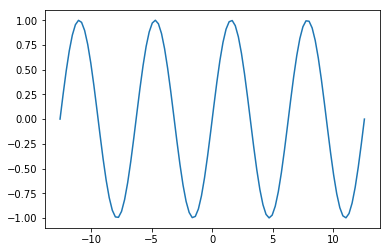

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4*np.pi, 4*np.pi, num=100)
y = y = np.sin(x)
plt.plot(x, y)

### 1.6) Pandas

Good package for data science and data manipulation.

In [2]:
import pandas as pd

lst = [2,4,6,8]
pd_ser = pd.Series(lst)
pd_ser

0    2
1    4
2    6
3    8
dtype: int64

In [3]:
# Append

pd_2 = pd.Series([10,12,14])
app = pd_ser.append(pd_2)
app

0     2
1     4
2     6
3     8
0    10
1    12
2    14
dtype: int64

In [15]:
# Add, subtract, multiply and divide series
#add, sub, mul, div

# median, min, max

print(pd_ser.add(pd_2))
print("Max series 1:", pd_ser.max())

0    12.0
1    16.0
2    20.0
3     NaN
dtype: float64
Max series 1: 8


In [6]:
#Data Frame

import numpy as np

array = np.random.randn(6,4) # Random array 6 rows 4 columns
col_names = ["A","B","C","D"]
df = pd.DataFrame(array, columns = col_names)
df

# Methods
# df.dtypes --> type of data (bool, string, ...), it's an object not a function
# df.head(4) --> first 4 values
# df.tail(4) --> last 4 values 
# df.dropna(subset = ['var'], axis = 0, inplace=True) --> drop missing values and replace data frame
# df['var'].replace(np.nan,x) --> replace missing values with x
# df.rename(columns = {'var1' : 'var2'}, inplace = True)
# df['var'].astype(dtype='float64', errors='ignore') --> ignore errors and keep original object
# df['var'].get_dummies()

# Binning --> grouping observations
# bins = np.linspace(df['x'].min(),df['x'].max(),4)
# names = ["low","medium","high"]
# df['x_binned'] = pd.cut(df['x'],bins,labels=names,include_lowest=True)

,A,B,C,D
0,-0.485213,2.629403,-0.011757,0.439331
1,2.390881,-0.648162,1.096498,0.152567
2,0.446197,0.597975,-2.504961,-1.235454
3,1.427470,0.424948,-1.881175,1.888245
4,0.539239,-0.603194,0.051320,-0.345799
5,0.928358,-1.083242,-1.157592,1.274607


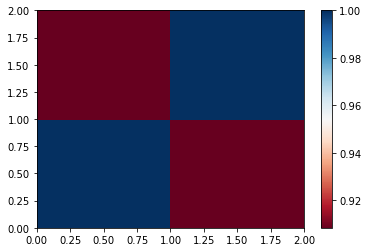

,y,x
y,1.000000,0.908362
x,0.908362,1.000000


In [57]:
# Correlation
from scipy import stats

x = [random.uniform(0,10) for i in range(100)]
y = [xi*3+random.uniform(-7,7) for xi in x]
d = {'y' : y, 'x' : x}
correl_DF = pd.DataFrame(d)
corr, p_value = stats.pearsonr(correl_DF['x'],scat_DF['y'])
corr,p_value

plt.pcolor(correl_DF.corr(), cmap='RdBu')
plt.colorbar()
plt.show()
correl_DF.corr()

In [8]:
# Summary Statistics
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.874489,0.219621,-0.734611,0.362250
std,0.974962,1.350547,1.350617,1.119371
min,-0.485213,-1.083242,-2.504961,-1.235454
25%,0.469457,-0.636920,-1.700279,-0.221207
50%,0.733798,-0.089123,-0.584675,0.295949
75%,1.302692,0.554718,0.035551,1.065788
max,2.390881,2.629403,1.096498,1.888245


In [22]:
# Sort

df.sort_values(by = ["A","B"], ascending=False)

,A,B,C,D
4,1.381603,1.191743,-0.591418,-0.052768
1,-0.068625,-0.135175,-0.032397,0.561336
5,-0.669442,1.749392,-0.906122,1.572677
2,-1.031190,-0.002987,-1.343089,-0.874983
3,-1.454343,0.322771,0.650970,1.723183
0,-1.858493,-0.193800,2.211238,-0.534670


In [23]:
 # Slice or select subset of columns
    
df[["A","D"]]

,A,D
0,-1.858493,-0.534670
1,-0.068625,0.561336
2,-1.031190,-0.874983
3,-1.454343,1.723183
4,1.381603,-0.052768
5,-0.669442,1.572677


In [9]:
#Useful methods
#A dictionary can be turned to dataframe, colnames are keys and values is correspondent list

dic_example = {"col1":[1,2,3,3],
               "col2":["A","B","C","D"]}
pandas_dict = pd.DataFrame(dic_example)
print(pandas_dict)

#Slicing
pandas_dict.iloc[0:2,0:2]

#Unique values
print("Unique values of col1:", pandas_dict.iloc[0:,0].unique())

#Operators, return array of booleans
print("Smaller than 3 in col1")
print(pandas_dict["col1"]<3)
filt = pandas_dict['col1']<3
pandas_dict[filt]
print("Variable (columns) types:")
print(pandas_dict.dtypes)

   col1 col2
0     1    A
1     2    B
2     3    C
3     3    D
Unique values of col1: [1 2 3]
Smaller than 3 in col1
0     True
1     True
2    False
3    False
Name: col1, dtype: bool
Variable (columns) types:
col1     int64
col2    object
dtype: object


In [10]:
# Categorical variables (count if)

n_categ_col2 = pandas_dict['col2'].value_counts()
n_categ_col2

D    1
A    1
B    1
C    1
Name: col2, dtype: int64

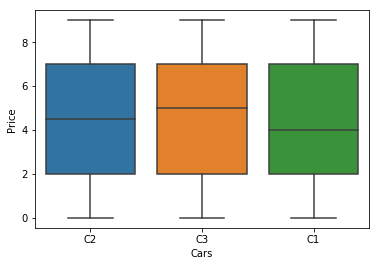

In [17]:
#Boxplot
import random
import seaborn as sns

cars = [random.choice(["C1","C2","C3"]) for i in range(1000)]
values = [random.choice(range(10)) for i in range(1000)]
d = {'Cars' : cars, 'Price' : values}
cars_DF = pd.DataFrame(d)
cars_DF.head()

sns.boxplot(x = 'Cars', y = 'Price', data = cars_DF)

Text(0, 0.5, 'y')

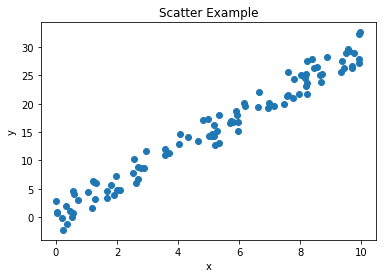

In [26]:
#Scatterplot
import matplotlib.pyplot as plt

x = [random.uniform(0,10) for i in range(100)]
y = [xi*3+random.uniform(-3,3) for xi in x]
d = {'y' : y, 'x' : x}
scat_DF = pd.DataFrame(d)
sct = plt.scatter(scat_DF['x'],scat_DF['y'])
plt.title("Scatter Example")
plt.xlabel("x")
plt.ylabel("y")

In [50]:
# Group by

group1 = [random.choice(["G11","G12","G13"]) for i in range(100)]
group2 = [random.choice(["G21","G22"]) for i in range(100)]
groups = {key: i for i,key in enumerate([i+j for i in ["G11","G12","G13"] for j in ["G21","G22"]])}
y = [groups[i+j]+random.uniform(-3,3) for i,j in zip(group1,group2)]
g_by = pd.DataFrame({'group1':group1,'group2':group2,'y':y})
grouped = g_by.groupby(['group1','group2'], as_index=False).mean()
grouped

,group1,group2,y
0,G11,G21,0.007435
1,G11,G22,0.152497
2,G12,G21,1.819683
3,G12,G22,3.249532
4,G13,G21,4.176339
5,G13,G22,5.405160


To have Group1 in rows and Group2 in columns to display a table or matrix you can use the pivot method.

In [40]:
pivot = grouped.pivot(index='group1', columns='group2')
pivot

y          
group2       G21       G22
group1                    
G11     0.198105  0.632313
G12     2.166562  3.707402
G13     3.849754  5.529988

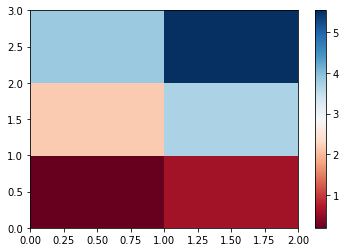

In [47]:
#Heatmap
#Heatmap works with a matrix in general, list of lists, np.array, etc. 

plt.pcolor(pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

In [29]:
# Read CSV, excel

df.to_csv('data.csv')
csv = pd.read_csv('data.csv')
csv
# excel = pd.read_excel('path/data.csv')

#### Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

x1 = [random.uniform(0,10) for i in range(1000)]
x2 = [random.uniform(0,10) for i in range(1000)]
y = [5+2*x_1+3*x_2+random.uniform(-7,7) for x_1,x_2 in zip(x1,x2)]
lm_DF = pd.DataFrame({'y':y,'x1':x1,'x2':x2})
lm=LinearRegression() #initialize a linear regression object
x=lm_DF[['x1','x2']]
y=lm_DF['y']
lm.fit(x,y)
betas = [lm.intercept_]+[b for b in lm.coef_]
print("betas:",betas)
print("R2:",lm.score(x,y))

betas: [5.236112001551621, 2.0128355482144813, 3.0038428244865614]
R2: 0.8707776320655696


NOTE: $R^2$ is the proportion of the variance in $Y$ explained by the variance in $X$. 

In [79]:
#Using pipeline with polynomials and scaling data
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe=Pipeline(Input) #Applies the step sequentially in order of input array
pipe.fit(x,y)
print("betas:",pipe.named_steps['mode'].coef_) #named_steps is a dictionary, so name gives you the value associated

betas: [ 0.          5.79795454  8.52039523  0.23557855 -0.02034616  0.03938191]


(0, 60.54670280932925)

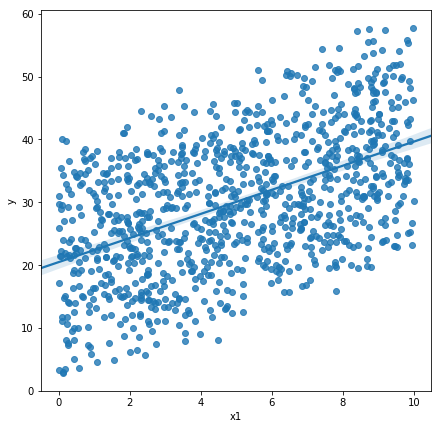

In [87]:
#Scatterplot with linear fit

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(7, 7)) #width, height
sns.regplot(x='x1', y='y', data=lm_DF)
plt.ylim(0,)

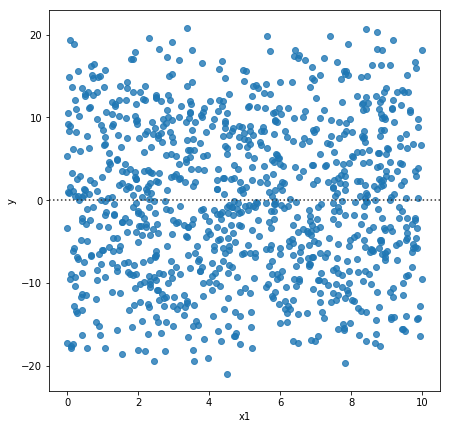

In [89]:
plt.figure(figsize=(7,7))
sns.residplot(lm_DF['x1'],y)
plt.show()

In [97]:
#Cross-validation

from sklearn.model_selection import train_test_split, cross_val_score

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=300,random_state=1234)
cross_val = cross_val_score(lm,x,y,cv=10)
cross_val #Array with R2 for each testing set

array([0.85228921, 0.81860523, 0.87452284, 0.84791261, 0.89928094,
       0.88424298, 0.86538561, 0.8484675 , 0.89520028, 0.872649  ])

#### Ridge Regression

You introduce an $\alpha$ parameter in the cost function, the higher the $\alpha$ parameter is the higher the penalty for a high coefficient, therefore it will bias them toward zero. Try with cross-validation to see which model fits best.


In [ ]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=.01)
RidgeModel.fit(x,y)

### 1.7) OPENPYXL

Good for excel manipulation

In [179]:
#In Anaconda prompt: >>> pip install openpyxl

import openpyxl
print("Openpyxl Version: ", openpyxl.__version__)
import os #Define the working path
os.chdir("C:\\Users\\hheim\\Downloads") #Slash for escaping
working_book = openpyxl.load_workbook("CE1999.xlsx")

#Get Sheets
sheets = working_book.sheetnames
CE99 = working_book[sheets[0]]

Openpyxl Version:  2.6.1


<Cell 'CE 1999'.A1>

In [191]:
#Values

CE99['D55'].value == CE99.cell(row=55,column=4).value

#Change value with
#>>> CE99['D55'].value = 5050

True

## 2) Strings

Strings are iterables in Python; you can reference index, etc.

In [131]:
# METHODS

'Hector' + ' Hernandez' # “Hector Hernandez”
'Hector'.zfill(10) # “0000Hector” Fill with zeros until you have length 10 string
str_list = 'Hello world'.split(" ") # [“Hello”, “world”]
stri = list('Hecc') # [“H”,”e”,”c”,”c”]
''.join('yes yes') # “yesyes” it could be a list as well
"abc".upper() # upper case
"ABC".lower() # lower case
"hello world".title().replace(" ", "")  # HelloWorld
"a a a a a".count("a") # returns 5 count of "a"
"hector".replace('h', 'H', 1) # “Hector”
'hectoraaabac'.rstrip('abc')  # Remove trailing characters from the right side --> hector


import string

'Hello! you.'.translate(str.maketrans('', '', string.punctuation)) # remove punctuation “Hello you”

#Unique elements

s = "HectorHdez"
set(s) # unique elements of the set
sorted(set(s.split()), key = s.index) # if sorting matters
sorted(s, reverse=True)

# Float decimals

print('%.2f' % 5) # 5.00

# String Glue

shepherd = "Jonny"
age = 25
stuff_in_string = "Shepherd %s is %d years old." % (shepherd, age) 


5.00


### Regular Expressions

https://www.w3schools.com/python/python_regex.asp

In [132]:
import re

re.findall('s', 'stringss') # [“s”, “s”, “s”]
re.search('\d', 'strin6gst5').group()  # first match of a digit in string --> “6”
'string'.find('g') # position of character --> 5

5

## 3) OBJECT ORIENTED PROGRAMMING

Attributes: color, shape, etc.

Methods: collision, distance, etc. (functions that only work with the class).

In [7]:
class coordinates(object): # object is most basic python element (coordinate is a subclass of object)
    def __init__(self, x=0, y=0): # attributes (a special method) when you create instance of coordinates it calls this method first
        self.x = x
        self.y = y
    def distance(self, other):
        x_dif_sq = float((self.x - other.x)**2)
        y_dif_sq = float((self.y - other.y)**2)
        return (x_dif_sq + y_dif_sq)**.5
    def __str__(self): # special method that tells Python what to print
        return str(self.x)+','+str(self.y)
    
class coor3d(coordinates): #subclass of coordinates which inherits methods and attributes
    def trial(self):
        print("Hello","(",self.x,")")
        
class reverse(int): #special methods
    def __add__(self,other):
        return self-other
    
i = reverse(5)
j = reverse(10)

print("reverse sum is: ", i+j)

p1 = coordinates(1,1)
p1.x = 2 #Change attributes of p1
p1.y = 2

origin = coordinates()
print('Distance between (0,0) and (1,1):', p1.distance(origin))

print("Is origin data a class coordinate:", isinstance(origin, coordinates))

p3d = coor3d(1,1)
p3d.trial()
p3d.distance(p1)

reverse sum is:  -5
Distance between (0,0) and (1,1): 2.8284271247461903
Is origin data a class coordinate: True
Hello ( 1 )


1.4142135623730951

In [19]:
class zombie(object):
    def __init__(self, health, damage):
        self.health = health
        self.damage = damage
    def take_damage(self):
        self.health -= 20
        print("Remaining health is:", self.health)
        
rob = zombie(100,30)
rob.take_damage()

Remaining health is: 80


You can also redefine special methods from other classes

In [141]:
class sum_dict(dict): #Parent class is dictionary
    def __add__(self, other): #you redefine what happens when you do '+'
        out = {}
        for key, value in self.items():
            out[key] = self[key]+other[key]
        return sum_dict(out)
    
d1 = sum_dict({"a": 1, "b": 3})
d2 = sum_dict({"a": 3, "b": 4})

print(d1,d2," sum of values in keys:", d1+d2)

{'a': 1, 'b': 3} {'a': 3, 'b': 4}  sum of values in keys: {'a': 4, 'b': 7}


In [9]:
#Implement a default list similar to defaultdict

class DefaultList(list):
    def __init__(self,it, default):
        super().__init__(it) #super() allows you to call methods from the superclass (list)
        self.default=default
    
    def __getitem__(self,i):
        try: return super().__getitem__(i-1)
        except IndexError: return self.default
        
a = DefaultList([1,2,3],"D")
a[2]

2

In [156]:
#4 in a row game

import numpy as np

class Connect4(object):

    def __init__(self):
        self.grid = [[0 for col in range(7)] for row in range(6)]
        self.player = 1
        self.finish = False
        
    def win_condition(self,row,col):
        #Check rows
        for i in range(5):
            try:
                if self.grid[row][col-4+i:col+i] == [self.player]*4:
                    return True
            except IndexError:
                continue
                
        #Check cols
        for i in range(5):
            try:
                if list(zip(*self.grid))[col][row-4+i:row+i] == tuple([self.player]*4):
                    return True
            except IndexError:
                continue
                
        #Check diagonal +
        for i in range(4):
            try:
                if [self.grid[row+j-i][col-j+i] for j in range(4) if 0<=row+j-i<=5 and 0<=col-j+i<=6] == [self.player]*4:
                    return True
            except IndexError:
                continue
        
        #Check diagonal -
        for i in range(4):
            try:
                if [self.grid[row-j+i][col-j+i] for j in range(4) if 0<=row-j+i<=5 and 0<=col-j+i<=6] == [self.player]*4:
                    return True
            except IndexError:
                continue
                
        return False    


    def play(self, col):
        if self.finish:
            return "Game has finished!"
        
        else:
            for i in range(6):

                #Column Full
                if self.grid[0][col] != 0:
                    return "Column full!"

                #If column is empty
                if list(zip(*self.grid))[col] == (0,0,0,0,0,0):
                    self.grid[5][col] = self.player
                    print(np.array(self.grid))
                    if self.win_condition(5,col):
                        self.finish = True
                        return "Player "+str(self.player)+" wins!"
                    out = "Player "+str(self.player)+" has a turn"
                    if self.player == 1:
                        self.player = 2
                    else:
                        self.player = 1
                    return out

                #If column is partially filled
                if self.grid[i+1][col] != 0:
                    self.grid[i][col] = self.player
                    print(np.array(self.grid))
                    if self.win_condition(i,col):
                        self.finish = True
                        return "Player "+str(self.player)+" wins!"
                    out = "Player "+str(self.player)+" has a turn"
                    if self.player == 1:
                        self.player = 2
                    else:
                        self.player = 1
                    return out
        
    
b = Connect4()
b.play(5)
b.play(4)
b.play(4)
b.play(3)
b.play(3)
b.play(2)
b.play(3)
b.play(2)
b.play(2)
b.play(0)
b.play(2)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 2 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 2 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 2 1 1 0 0]
 [0 0 2 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 2 1 1 0 0]
 [0 0 2 2 2 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0

'Player 1 wins!'

## 4) Algorithms

### Breadth First Search

Imagine you have maze 

        [0,0,0,1,1,1]
        [0,1,0,1,0,1]
        [0,1,0,0,0,1]
        [1,1,1,1,0,0]

Start at (0,0) and look at its children, add (0,0) to nodes visited and create list of children.
<br>
For children (1,0) you can go to (2,0), add (1,0) to visited and (2,0) to nodes to visit.
<br>
For children (0,1) you can go to (0,2), add (0,1) to visited and (0,2) to nodes to visit.
<br>
For node (2,0) you can’t move (visited and ones blocking)
<br>
For node (0,2) you can move to (1,2) add it to nodes to visit.
<br>
And so on
<br>
If there are no nodes to visit it means you’ve traversed all of the possible children

In [54]:
from operator import add
from operator import sub

maze = [[0,0,0,1,1,1],
        [0,1,0,1,0,1],
        [0,1,0,0,0,1],
        [1,1,1,1,0,0]]

directions = {(1,0) : "down",
             (0,1) : "right",
             (-1,0) : "up",
             (0,-1) : "left"}

def BFS(maze,start=(0,0)):
    ch = [start]
    vis = [start]
    parent = {}
    while ch:
        l = []
        for c in ch:
            for k,v in directions.items():
                m = tuple(map(add,c,k))
                try:
                    if maze[c[0]+k[0]][c[1]+k[1]] == 0:
                        if m not in vis:
                            l.append(m)
                            vis.append(m)
                            parent[(c[0]+k[0],c[1]+k[1])] = c
                except IndexError:
                    continue
        ch = l
    out = []
    while c != start :
        out.append(directions[tuple(map(sub,c,parent[c]))])
        c = parent[c]
    return out[::-1]

BFS(maze)

['right', 'right', 'down', 'down', 'right', 'right', 'down', 'right']

### DIJKSTRA

{('A', 'B'): Text(0.0, 5.0, '10'),
 ('A', 'C'): Text(0.5, 3.5, '5'),
 ('C', 'B'): Text(0.5, 8.5, '7')}

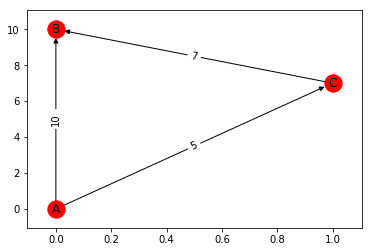

In [35]:
#For help with methods do instance.method?

import networkx as nx 
G = nx.DiGraph() 

nodes = [("A", {'pos':(0,0)}),("B", {'pos':(0,10)}),("C", {'pos':(1,7)})]
G.add_nodes_from(nodes)
edges = [("A","B",10),("A","C",5),("C","B",7)]

pos = nx.get_node_attributes(G,"pos")
G.add_weighted_edges_from(edges) 
weights = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)


1) Start at node A
<br>
2) Algorithm extracts min distance (5 to node C)
<br>
3) Algorithm takes distance to B --> 10 because it is smaller than 5+7=12

Why doesn’t C need to visit B at the end of the algorithm? Because weights are non-negative you guarantee that the path through A → B is smaller, if weights were negative things get complicated because C could visit B and have a shorter path.

Proof by induction:  imagine you have 3 nodes that can get to destination, those 3 nodes have the minimum distance to them known. The algorithm will choose the minimum distance from any of those 3 nodes to destination and will guarantee the minimum distance.

## 5) Txt Files

In [49]:
import os #Define the working path
os.chdir("C:\\Users\\hheim\\Documents") #Slash for escaping

#Second input (called mode)
#w: writing
#r: reading
#a: appending
trial_file = open("trial.txt","r") #file object
trial_name = trial_file.name
trial_content = trial_file.read()
trial_file.close() # you should always close

#To avoid having to close
#NOTE: you use is twice because otherwise you run through the file (iterator?)
with open("trial.txt","r") as file1:
    trial_lines = file1.readlines() 
    print(trial_lines)
    
with open("trial.txt","r") as file1:
    trial_cont = file1.read()
    print(trial_cont)


['trial line1 \n', 'trial line2 \n', 'trial line3 ']
trial line1 
trial line2 
trial line3 


In [55]:
with open("trial.txt","r") as source:
    with open("trial_py.txt","w") as output:
        output.write(source.read()+"\ntrial line4: added with Python")
    
with open("trial_py.txt","r") as tpy:
    print(tpy.read())

trial line1 
trial line2 
trial line3
trial line4: added with Python


##  6) Application Program Interfaces (APIs)

You have your program, you have some data, you have other software components, you use the API to communicate with the API via inputs and outputs. Just like a function, you don't have to know how the API works but just as inputs and outputs. Pandas is actually a set of software components much of which are not even written in Python. You have some data. You have a set of software components. We use the pandas API to process the data by communicating with the other software components. 

### 6.1) Representational State Transfer (REST APIs)

They allow you to communicate through the Internet allowing you to take advantage of resources like storage, access more data, artificial intelligent algorithms and much more.

The client sends requests to the resource and the response to the client. HTTP methods are a way of transmitting data over the internet. We tell the REST APIs what to do by sending a request. The request is usually communicated via an HTTP message. The HTTP message usually contains adjacent file. This contains instructions for what operation we would like the service to perform. This operation is transmitted to the web service via the Internet. The service performs the operation. In the similar manner, the web service returns a response via an HTTP message, where the information is usually return the adjacent file. 

In [92]:
#In Anaconda prompt: > pip install nba_api

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

nba_teams = teams.get_teams()
nba_dict = {key : [] for key,value in nba_teams[0].items()}
bulls_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612741)
bulls_games_DF = bulls_games.get_data_frames()[0]

for team in nba_teams:
    for key,value in nba_teams[0].items():
        nba_dict[key].append(team[key])

nba_DF = pd.DataFrame(nba_dict)
nba_DF.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [93]:
bulls_games_DF.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612741,CHI,Chicago Bulls,0021900962,2020-03-10,CHI vs. CLE,W,241,108,...,0.800,14,32,46,23,8,6,21,21,0.8
1,22019,1610612741,CHI,Chicago Bulls,0021900946,2020-03-08,CHI @ BKN,L,240,107,...,0.680,5,26,31,23,14,3,7,31,-3.0
2,22019,1610612741,CHI,Chicago Bulls,0021900934,2020-03-06,CHI vs. IND,L,240,102,...,0.867,17,28,45,27,12,6,17,25,-6.0
3,22019,1610612741,CHI,Chicago Bulls,0021900922,2020-03-04,CHI @ MIN,L,241,108,...,0.636,9,31,40,24,10,5,10,19,-7.0
4,22019,1610612741,CHI,Chicago Bulls,0021900907,2020-03-02,CHI vs. DAL,W,240,109,...,0.647,12,30,42,24,7,5,14,21,2.0


## 7) Structured Query Language (SQL)



## 8) General discoveries

### PRICE OF FUTURES

What's the price $P_{t=1}$ if $r_f=5\%$ and $P_{t=0}=100$?

It can only be $P_{t=1}=105$. 

Consider it was bigger (110) then:

1) Borrow 100 from bank
<br>
2) Long stock (buy at t=0)
<br>
3) Future sell stock for 110
<br>
4) Pay 105 only to bank

Consider it was smaller (100) then:

1) Short stock
<br>
2) Deposit at risk free
<br>
3) Collect 105 from bank
<br>
4) Pay 100 for stock and return it

### PERMUTATIONS

Permutations:

If you have repeated elements in a set, how do you calculate the number of different arrangements? If they are all distinct simply permutations.

If for example one element (A=B=C) is repeated 3 times, then:

A _ B C _ 
<br>
A _ C B _ 
<br>
B _ A C _
<br>
B _ C A _
<br>
C _ A B _
<br>
C _ B A _

All of the previous elements will be counted in Perm(5,5), therefore we divide by Perm(3,3) = 6

If there is another element (D=E) repeated:

A D B C E
<br>
A E B C D

It is counted twice in P(5,5), therefore we additionally divide by P(2,2) = 2. Instead of getting $5*4*3*2 = 120$, we get $\frac{5*4*3*2}{6*2} = 10$

### LENGTH OF A LINE IN A 3D PLANE

Use pythagoras twice, first to find the hypothenuse in the x,y plane and then use that as adjacent length and the height of Z for oppose $\sqrt{x^2+y^2+z^2}$

### GRADIENT DESCENT

To find the global minimum when there is no closed form solution:

repeat until convergence {
<br>
    Simultaneuous change
    $\theta_0, \theta_1, ..., \theta_j := \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)$ $\forall$ $j$
<br>
}

$\alpha$ is the magnitude of the gradient descent.

In [115]:
# Gradient Descent one dimension
# Min value y=x^2

from math import isclose

def grad_descent(initial,alpha):
    prev = float(initial)
    nex = prev-alpha*2*prev
    while not isclose(prev,nex,abs_tol=1e-6):
        prev = float(nex)
        nex = float(prev-alpha*2*prev)
        print(nex,prev)
    return round(nex,5)  

grad_descent(4,.25)

1.0 2.0
0.5 1.0
0.25 0.5
0.125 0.25
0.0625 0.125
0.03125 0.0625
0.015625 0.03125
0.0078125 0.015625
0.00390625 0.0078125
0.001953125 0.00390625
0.0009765625 0.001953125
0.00048828125 0.0009765625
0.000244140625 0.00048828125
0.0001220703125 0.000244140625
6.103515625e-05 0.0001220703125
3.0517578125e-05 6.103515625e-05
1.52587890625e-05 3.0517578125e-05
7.62939453125e-06 1.52587890625e-05
3.814697265625e-06 7.62939453125e-06
1.9073486328125e-06 3.814697265625e-06
9.5367431640625e-07 1.9073486328125e-06


0.0

Normalizing variables increase the running time of algorithm. It can be used more efficiently than the closed form if you have a lot of covariates (covs = 10000).

### NEURAL NETWORKS

For non-linear hypotheses it can be very computationally expensive to include a multitude of covariates for a classification problem by using say a logistic regression. Consider the case of a 100 X 100 picture, every pixel is a dimension or variable in the regression; if you include the interactions then it's 10000*9999/2.

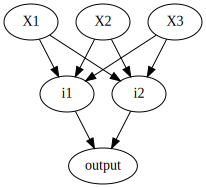

In [3]:
# Graphic reprentation

neural = Digraph()

neural.node("X1","X1")
neural.node("X2","X2")
neural.node("X3","X3")
neural.node("i1", "i1")
neural.node("i2","i2")
neural.node("output","output")

neural.edge("X1","i1")
neural.edge("X1","i2")
neural.edge("X2","i1")
neural.edge("X2","i2")
neural.edge("X3","i1")
neural.edge("X3","i2")
neural.edge("i1","output")
neural.edge("i2","output")

neural

$i^{(layer+1)}_j = g(\Phi^{layer}_{0,j}X_1 +\Phi^{layer}_{1,j}X_2+\Phi^{layer}_{1,j}X_3)$   $ \forall j \in [1,2]$

$output_{\Phi}^3 = g(\Phi^2_{0,1}i^2_1+\Phi^2_{0,2}i^2_2) = g(\Phi^2i^2)$

A one layer with constant and two binary inputs $X_1, X_2$ allows a logistic regression to classify $X_1 and X_2$, $X_1 or X_2$, etc.

Consider $g(-10+20X_1+20X_2)$ if either $X_1$ or $X_2$ is $1$ then the logistic regression throws $\approx 1$.

You can add layers of complexity, now imagine you want $X_1$ $NOR$ $X_2$ (1 if $X_1=$X_2, else 0) first $X_1 \& X_2$ and $(not X_1) $ $\&$ $ (not X_2)$ in the first layer then $i_1$ or $i_2$ in second layer.

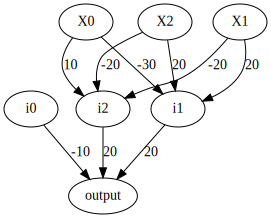

In [4]:
neural2 = Digraph()

neural2.node("X0","X0")
neural2.node("X1","X1")
neural2.node("X2","X2")
neural2.node("i0","i0")
neural2.node("i1", "i1")
neural2.node("i2","i2")
neural2.node("output","output")

neural2.edge("X0","i1", label="-30")
neural2.edge("X0","i2", label="10")
neural2.edge("X1","i1", label="20")
neural2.edge("X1","i2",label="-20")
neural2.edge("X2","i1", label="20")
neural2.edge("X2","i2",label="-20")
neural2.edge("i0","output",label="-10")
neural2.edge("i1","output",label="20")
neural2.edge("i2","output",label="20")

neural2

In [35]:
import numpy as np
import pandas as pd

cols = ["X1", "X2", "i1", "i2", "output"]
neu = np.array([[1,1,1,0,1],
                 [1,0,0,0,0],
                 [0,1,0,0,0],
                 [0,0,0,1,1]])

pd.DataFrame(neu, columns = cols)

,X1,X2,i1,i2,output
0,1,1,1,0,1
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,1


#### Backpropagation Algorithm

Find the minimum of the cost function for neural networks.

The cost function for a logistic regression (using MLE and remembering the logs turn multiplications to sums) is:

$J(\theta)=-\frac{1}{m}[\sum y_ilog(h_\theta(x_i))+(1-y_i)log(1-h_\theta(x_i))]$

$\frac{\partial}{\partial \theta_j}=\frac{1}{m}\sum(h_\theta(x_i)-y_i)x_i^j$

#### Scaling Methods

Simple Feature Scaling: $x=\frac{x}{x_{max}}$

Min-Max: $x=\frac{x-x_{min}}{x_{max}-x_{min}}$

Z-score: $x=\frac{x-\mu}{\sigma}$

##  Appendix

### Useful functions

In [100]:
# Reference variables outside a nested function with nonlocal

def outer():
    nlocal = "Jiren is nonlocal"
    def inner():
        loc = "Goku is local"
        print(loc)
        nonlocal nlocal
        print(nlocal)
    inner()
    
outer()

#CACHE

from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n):
    if n == 0: return 0
    if n == 1: return 1
    else: return fib(n-1)+fib(n-2)

print("Fibonacci 100 is:", fib(100))

# Faster Fib
def fib2(n):
    a,b=0,1
    i=1
    while i<n:
        a,b=b,a+b
        i+=1
    return b

# ITERTOOLS

import itertools
iter1 = [1,2]
iter2 = [3,4]
itertools.chain(iter1, iter2) # will iter through iter1 and 2 in single sequence
itertools.zip_longest([1,2],[3,4,5]) # [(1, 3), (2, 4), (None, 5)]
itertools.product('ABC',repeat= 2) # [AA, AB, AC, BA, BB, BC, CA, CB, CC]

# USEFUL FUNCTIONS

sum(range(min(5, 10), max(5, 10) + 1)) # sum of numbers between [a,b]
4 % 5 # modulus (remainder of 4/3 is 1)
round(2.455,2) # 2.46
lst = [True, True, True] 
# all[lst] # returns True (useful for multiple and conditions)

import bisect
bisect.bisect_right([3,66,89,100], 89) # easily find the index to split a sorted list log(n)

# function(*args) → for variable number of arguments

# FUNCTOOLS

# map(function, list) → apply function to all elements in list (gives map object call list to visualize)
# filter(lambda x: x < 0, number_list)

# EXCEPTIONS

for i in [1.1,2.2,3.3,"a",5.5]:
    try:
        i = int(i)
    except ValueError:
        pass

# UNIT TESTS

def circle_area(r):
    if r <0:
        raise ValueError("Input must be positive")
    return pi*r**2

import unittest
class test_circle(unittest.TestCase): 
    def test1(self):
        self.assertAlmostEqual(circle_area(1), pi)
    def test2(self):
        self.assertRaises(ValueError, circle_area, -2)


Goku is local
Jiren is nonlocal
Fibonacci 100 is: 354224848179261915075


Given an array, find if two numbers (for distinct indices) are equal and if the absolute difference is bigger than k.

In [26]:
import random

def ayoo(array, k):
    print(array)
    aux = {}
    for i,x in enumerate(array):
        if x not in aux: aux[x]=i
        elif i-aux[x]>k: return True
    return False

random.seed(123)
ayoo([random.randint(1,20) for i in range(15)],3)


[2, 9, 3, 14, 9, 4, 2, 13, 18, 18, 11, 11, 2, 6, 5]


True

### Sudoku Solver

The idea is recursively solving it by backtracking if you fail to complete the puzzle. 

The intuition is:

(1) Try a possible value in empty cell and replace.
<br>
(2) Call your function again with updated puzzle.
<br>
(3) If the function reaches an empty cell that cannot be filled by any number there is a mistake, so you backtrack to the previous layer and change the value to the next possible number. Additionally, this means that if all of the possible values have been looped through in this previous layer there is also a mistake, so it will backtrack again. This implies that correct values should never change because the puzzle will first be solved as opposed to finishing the loop of possible values.
<br>
(4) Continue the process until the puzzle has been filled, at which point you return the puzzle.


In [1]:
#Sudoku

import numpy as np

puzzle = [[5,3,0,0,7,0,0,0,0],
          [6,0,0,1,9,5,0,0,0],
          [0,9,8,0,0,0,0,6,0],
          [8,0,0,0,6,0,0,0,3],
          [4,0,0,8,0,3,0,0,1],
          [7,0,0,0,2,0,0,0,6],
          [0,6,0,0,0,0,2,8,0],
          [0,0,0,4,1,9,0,0,5],
          [0,0,0,0,8,0,0,7,9]]

puzzle2 =[[4,0,0,0,0,0,9,0,8],
          [0,5,9,0,0,0,0,0,0],
          [0,0,0,1,4,0,0,3,5],
          [5,0,6,0,0,0,0,9,1],
          [0,0,0,0,8,0,0,0,0],
          [2,9,0,0,0,0,8,0,6],
          [6,4,0,0,3,7,0,0,0],
          [0,0,0,0,0,0,3,8,0],
          [8,0,2,0,0,0,0,0,7]]


def possible(puzzle,row,col,n):
    if n in puzzle[row]: return False
    if n in list(zip(*puzzle))[col]: return False
    for i in range(3):
        if n in puzzle[row//3*3+i][col//3*3:col//3*3+3]: return False
    return True

def sudoku(puzzle):
    for row in range(9): 
        for col in range(9): #rows and cols
            if puzzle[row][col] == 0:
                for n in range(1,10): #1
                    if possible(puzzle,row,col,n):
                        puzzle[row][col]=n #if possible change the number
                        out = sudoku(puzzle) # go to next layer
                        if out: return puzzle
                        puzzle[row][col]=0 #if you reach this line it means the assigned number didn't work in one of the next layers
                                               #therefore, you set it to zero because the "possible" function might reject a potential possibility
                                               #Notice that the depth doesn't matter because of the previous, it can be one nest level
                                               #Above with no consequence
                return #You return to the previous layer if all values have been tried, if loop (1) finishes it means a mistake so you backtrack
    return True

    

sudoku(puzzle)
sudoku(puzzle2)



[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]] heitor
[[4 6 1 2 5 3 9 7 8]
 [3 5 9 6 7 8 4 1 2]
 [7 2 8 1 4 9 6 3 5]
 [5 8 6 3 2 4 7 9 1]
 [1 7 4 9 8 6 2 5 3]
 [2 9 3 7 1 5 8 4 6]
 [6 4 5 8 3 7 1 2 9]
 [9 1 7 5 6 2 3 8 4]
 [8 3 2 4 9 1 5 6 7]] heitor


[[4, 6, 1, 2, 5, 3, 9, 7, 8],
 [3, 5, 9, 6, 7, 8, 4, 1, 2],
 [7, 2, 8, 1, 4, 9, 6, 3, 5],
 [5, 8, 6, 3, 2, 4, 7, 9, 1],
 [1, 7, 4, 9, 8, 6, 2, 5, 3],
 [2, 9, 3, 7, 1, 5, 8, 4, 6],
 [6, 4, 5, 8, 3, 7, 1, 2, 9],
 [9, 1, 7, 5, 6, 2, 3, 8, 4],
 [8, 3, 2, 4, 9, 1, 5, 6, 7]]

In [152]:
def nest(array):
    out = 0
    def nested_return(array):
        for elem in array:
            if type(elem) is list:
                nested_return(elem)
            else:
                if type(elem) is str:
                    print(elem)
                    nonlocal out
                    out = str(elem)
    nested_return(array)
    return out
        
nest([["K"],[[1]]])

K


'K'

### Find Position of string

There is a infinite string. You can imagine it's a combination of numbers from 1 to n, like this:

"123456789101112131415....n-2n-1n"
Please note: the length of the string is infinite. It depends on how long you need it(I can't offer it as a argument, it only exists in your imagination) ;-)

Complete function findPosition that accept a digital string num. Returns the position(index) of the digital string(the first appearance).

The basic idea is to check if string of length (1 to len(string)) follows a +1. You start with length 1 and work your way up. 

In [158]:
class sum_str(str):
    def sum_s(self,other):
        a = self[::-1]
        b = other[::-1]
        max_lenab = max(len(a), len(b))
        out = ""
        add_on = 0
        for digit in range(max_lenab):
            try:
                partial = str(int(a[digit])+int(b[digit])+add_on)
            except IndexError:
                if len(a) > len(b): partial = str(int(a[digit])+add_on)
                else: partial = str(int(b[digit])+add_on)
            if digit == max_lenab-1: out += partial[::-1]
            else: out += partial[-1]
            if len(partial) == 2: add_on = int(partial[0])
            else: add_on = 0
        return out[::-1]
    

def rec_aux(n,l=1,t9=False):
    p, b, one = [], [], sum_str("1")
    if set(n) == set("0") : return (int("1"+n),0)
    #There are l = length of output possibilities
    for s in range(l):
        out = True
        #if s == 0 leave number = n input the same
        #else you add the n[l-s:l] to n --> input CHECK THIS ONE FOR 9992000
        if s > 0: 
            if set(n[0:l-s]) == set("9"): 
                if n[l-s:l+1] == "1"+"0"*s: ni = "9"*s+str(n)
                else: 
                    if int(n[l-s:l]) == 0: ni = "0"+str(n)
                    else: ni = str(int(n[l-s:l])-1)+str(n)
            else: ni = str(n[l-s:l])+str(n)
            ex = len(str(n[l-s:l]))
        else: ni, ex = n, 0
        for d in range(0,len(ni)-l,l):
            n1, n2 = ni[d:d+l], ni[d+l:d+2*l]
            if d == 0: nf = n1
            if set(n1) == set("9"):
                d2, t9 = d, True
                break
            if len(n1)>len(n2):
                ap = n1[len(n2):len(n1)]
                if set(ap) == set("9"): n2 = n2+len(ap)*"0"
                else: n2 = sum_str(n2+ap).sum_s(one)
            if sum_str(n1).sum_s(one) == n2 and (sum_str(n1).sum_s(one)[0],n2[0]) != ("0","0"):
                continue
            else:
                out = False
                break
        if t9:
            #You aren't putting out = False and because of length of input it doesn't go into loop, so it skips it
            #Check length of input
            l2 = l+1
            if d2>=len(ni)-l2: 
                n1, n2 = ni[d2:d2+l], sum_str(n1).sum_s(one)
                if ni[d2+l:len(ni)] != n2[0:len(ni)-d2-l]: out = False
            else:
                for d in range(d2,len(ni)-l,l2):
                    if d == d2: n1,n2 = ni[d2:d2+l], ni[d2+l:d2+l+l2]
                    else: n1,n2 = ni[d-1:d+l2-1], ni[d+l2-1:d+2*l2-1]
                    if sum_str(n1).sum_s(one) == n2 and (sum_str(n1).sum_s(one)[0],n2[0]) != ("0","0"):
                        continue
                    else:
                        out = False
                        break
        if out: 
            try:
                if nf[0] != "0": 
                    p.append((int(nf),ex))
                    b.append(out)
            except UnboundLocalError:
                if ni[0] != "0":
                    p.append((int(ni),ex))
                    b.append(out)
    if any(b): return min(p,key=lambda elem: elem[0])
    return rec_aux(n,l+1)

            
def find_position(n):
    f,ex = rec_aux(n)
    m = len(str(f))
    e = f - 10**(m-1)
    p = sum((i+1)*9*10**i for i in range(m-1)) + e*m + ex
    print(f,ex,n,p)
    return p

rec_aux("91718") 


(17179, 4)